In [46]:
from irp.q import Q
from irp.envs import Sahba2008UltraSoundEnv
from irp.wrappers import Discretize
from irp import utils

from gym.wrappers import TimeLimit
import numpy as np

In [54]:
# Define the model we'll use
model_id = 3

In [55]:
# Extract the meta-data associated with the model we'll use
experiment = np.load(f'../irp/results/sahba2008/meta_{model_id}.npy', allow_pickle=True).item()['experiment']
# Load the images we'll use
data = utils.make_sample_label(experiment['train_image_path'], experiment['test_image_path'])
# Only use the train images
train_image, train_label = data[0]

In [56]:
# Values we need to setting up the environment and model again
values = ['num_thresholds', 'vjs', 'lows', 'highs', 'bins', 'episode_length']
# Extract the values
num_thresholds, vjs, lows, highs, bins, episode_length = [experiment[key] for key in values]

In [57]:
# Initialize the environment
env = Sahba2008UltraSoundEnv(train_image, train_label, num_thresholds, vjs)
# Cast continuous values to bins
env = Discretize(env, lows, highs, bins)
# Set a maximum episode length
env = TimeLimit(env, episode_length)

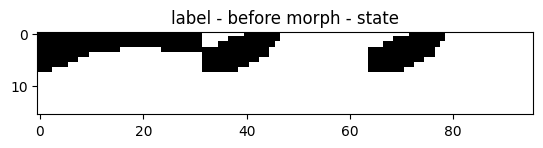

In [58]:
# Show a rendering of the environment
s = env.reset()
env.render()

In [59]:
model_path = f'../irp/results/sahba2008/model_{model_id}'
model = Q.load(model_path, env)

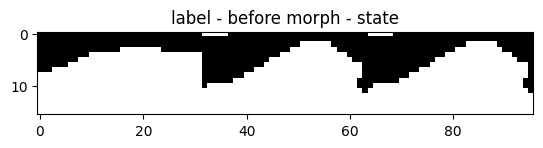

In [113]:
a = model.predict(s, deterministic=False)
s1, r, d, i = env.step(a)

env.render()

s = s1